In [388]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [389]:
btc = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2017, 1, 1), end=datetime.datetime(2018, 12, 27))
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1001.609985,956.099976,963.380005,995.440002,40570922,995.440002
2017-01-02,1031.680054,990.200012,995.440002,1017.049988,66038073,1017.049988
2017-01-03,1035.469971,1006.530029,1017.049988,1033.300049,56085870,1033.300049
2017-01-04,1148.540039,1022.320007,1033.300049,1135.410034,170584623,1135.410034
2017-01-05,1150.630005,874.530029,1135.410034,989.349976,244839289,989.349976


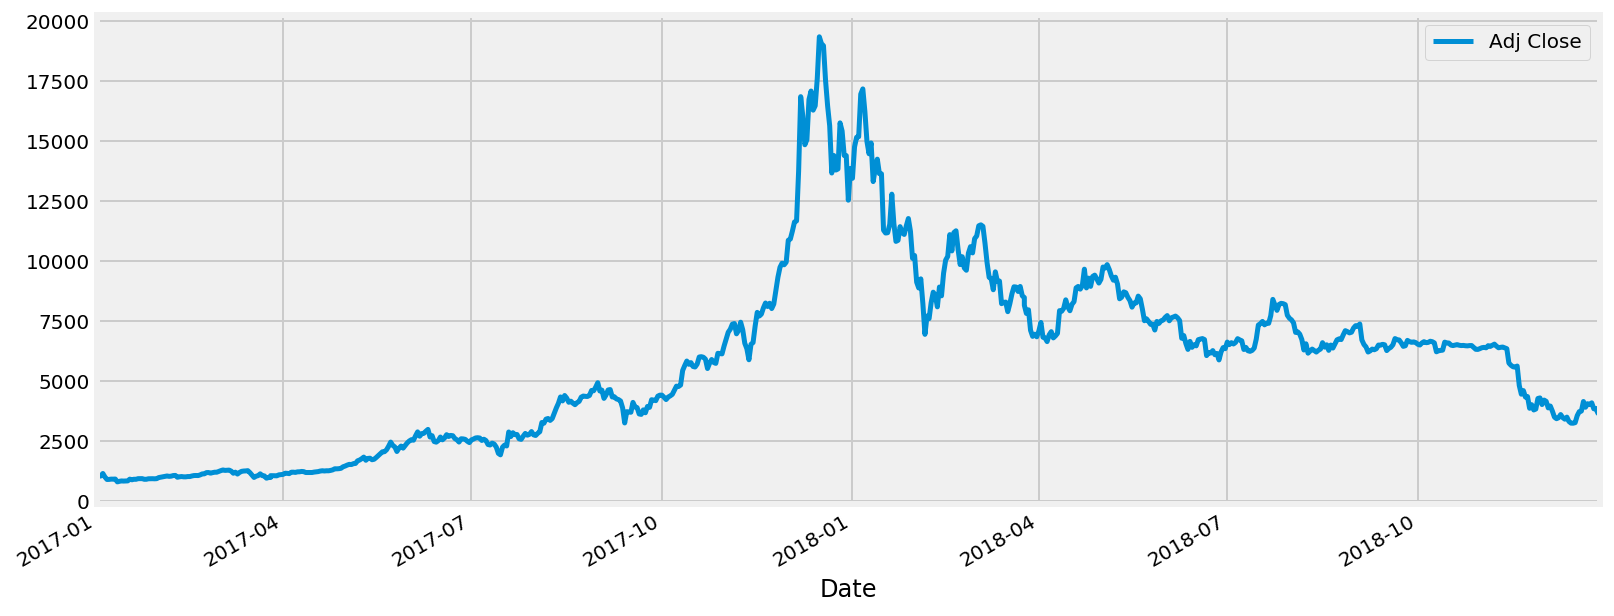

In [390]:

btc_adj = btc[['Adj Close']].copy()
btc_adj.plot(lw=2.5, figsize=(12, 5))
plt.show()

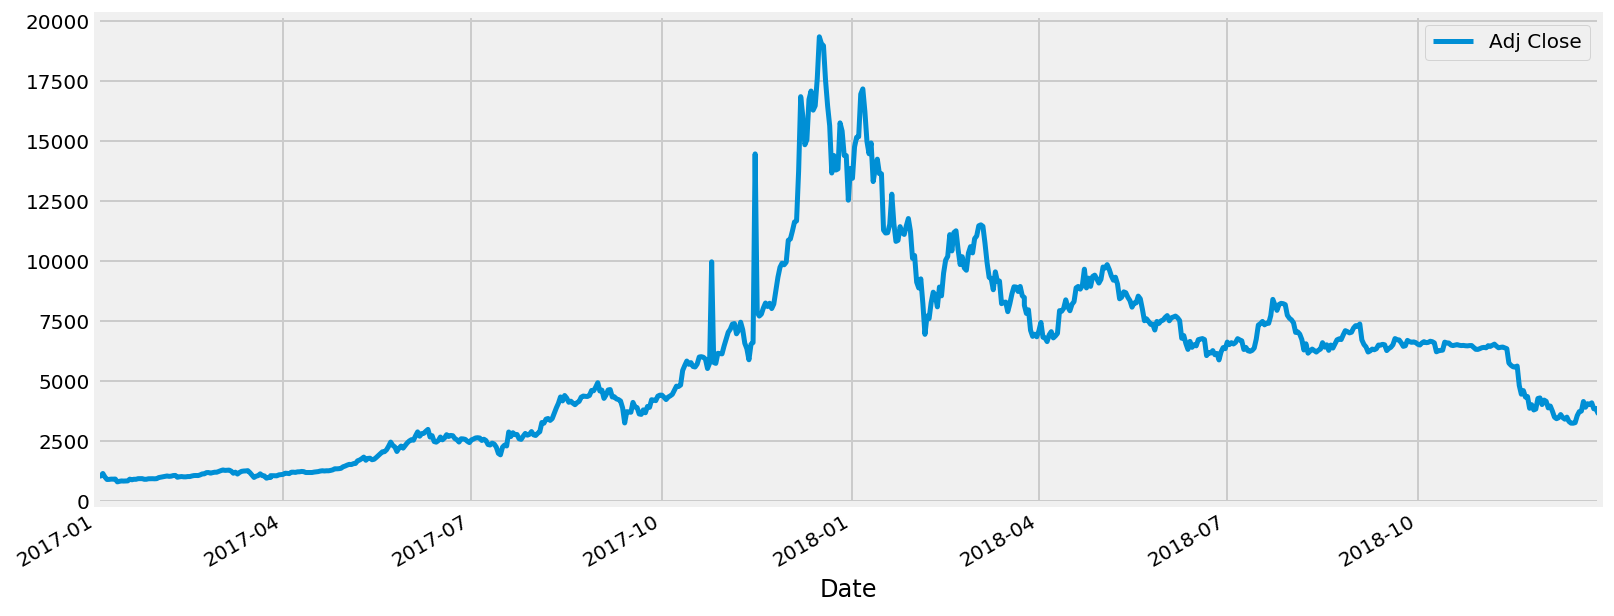

In [391]:
btc_adj['Adj Close']=btc_adj['Adj Close']
btc_adj.loc[(btc_adj.index == '2017-11-15'),'Adj Close'] = 14461.970
btc_adj.loc[(btc_adj.index == '2017-10-25'),'Adj Close'] = 9961.970
btc_adj.plot(lw=2.5, figsize=(12, 5))
plt.show()

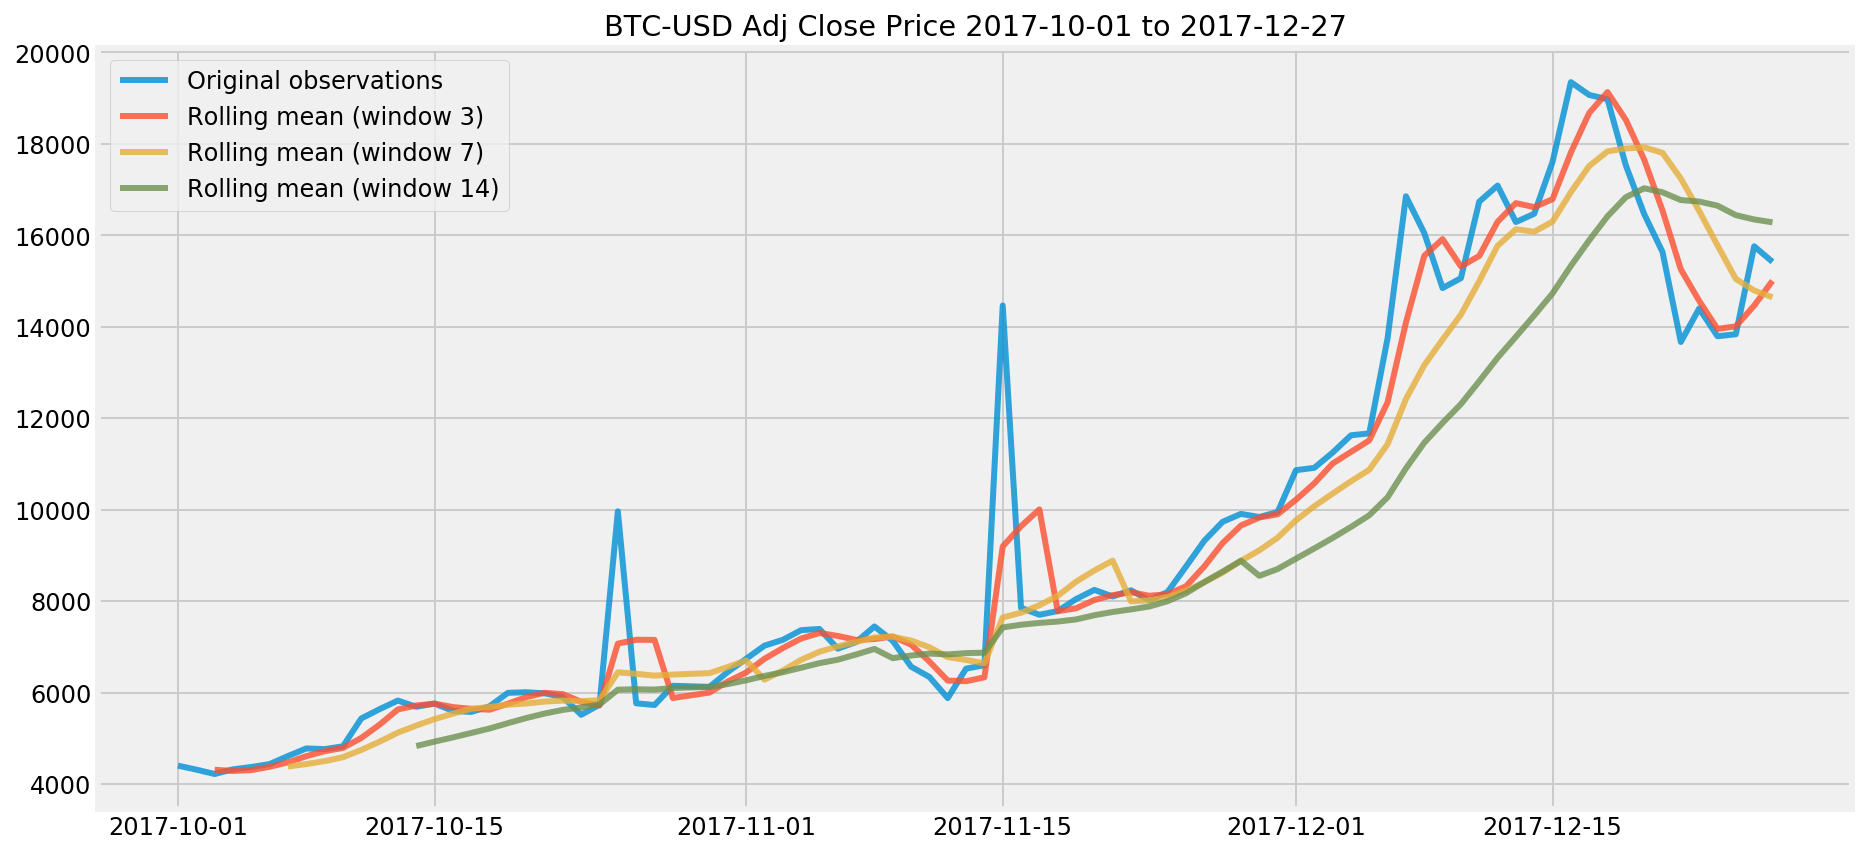

In [392]:
btc_recent = btc_adj.loc['2017-10-01':'2017-12-27'].copy()
rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()
plt.figure(figsize=(14, 7))
plt.plot(btc_recent.index, btc_recent, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(btc_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(btc_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')
plt.title('BTC-USD Adj Close Price 2017-10-01 to 2017-12-27')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [83]:
from scipy import stats
#btc_recent[(np.abs(stats.zscore(btc_recent)) < 3).all()]

4314.18017578125

In [96]:
#pbtc = btc_recent[(np.abs(stats.zscore(btc_recent)) < 2)].copy()


In [294]:
pbtc = btc_recent.copy()

In [245]:
pbtc.head()

,Adj Close
Date,
2017-10-01,4401.319824
2017-10-02,4314.180176
2017-10-03,4218.660156
2017-10-04,4321.439941
2017-10-05,4371.939941


In [132]:
pbtc['Adj Close'] = pbtc['Adj Close']

In [171]:
pbtc.loc[(np.abs(stats.zscore(pbtc['Adj Close'].values)) > 2),'Adj Close'] = pbtc['Adj Close']*0.9

In [295]:
median = pbtc.loc[(np.abs(stats.zscore(pbtc['Adj Close'].values)) < 1)].median()
pbtc.loc[(np.abs(stats.zscore(pbtc['Adj Close'].values)) > 3), 'Adj Close'] = np.nan
pbtc.fillna(median,inplace=True)

In [296]:
pbtc.head()

,Adj Close
Date,
2017-10-01,4401.319824
2017-10-02,4314.180176
2017-10-03,4218.660156
2017-10-04,4321.439941
2017-10-05,4371.939941


In [422]:
btc_recent.shape

(87, 1)

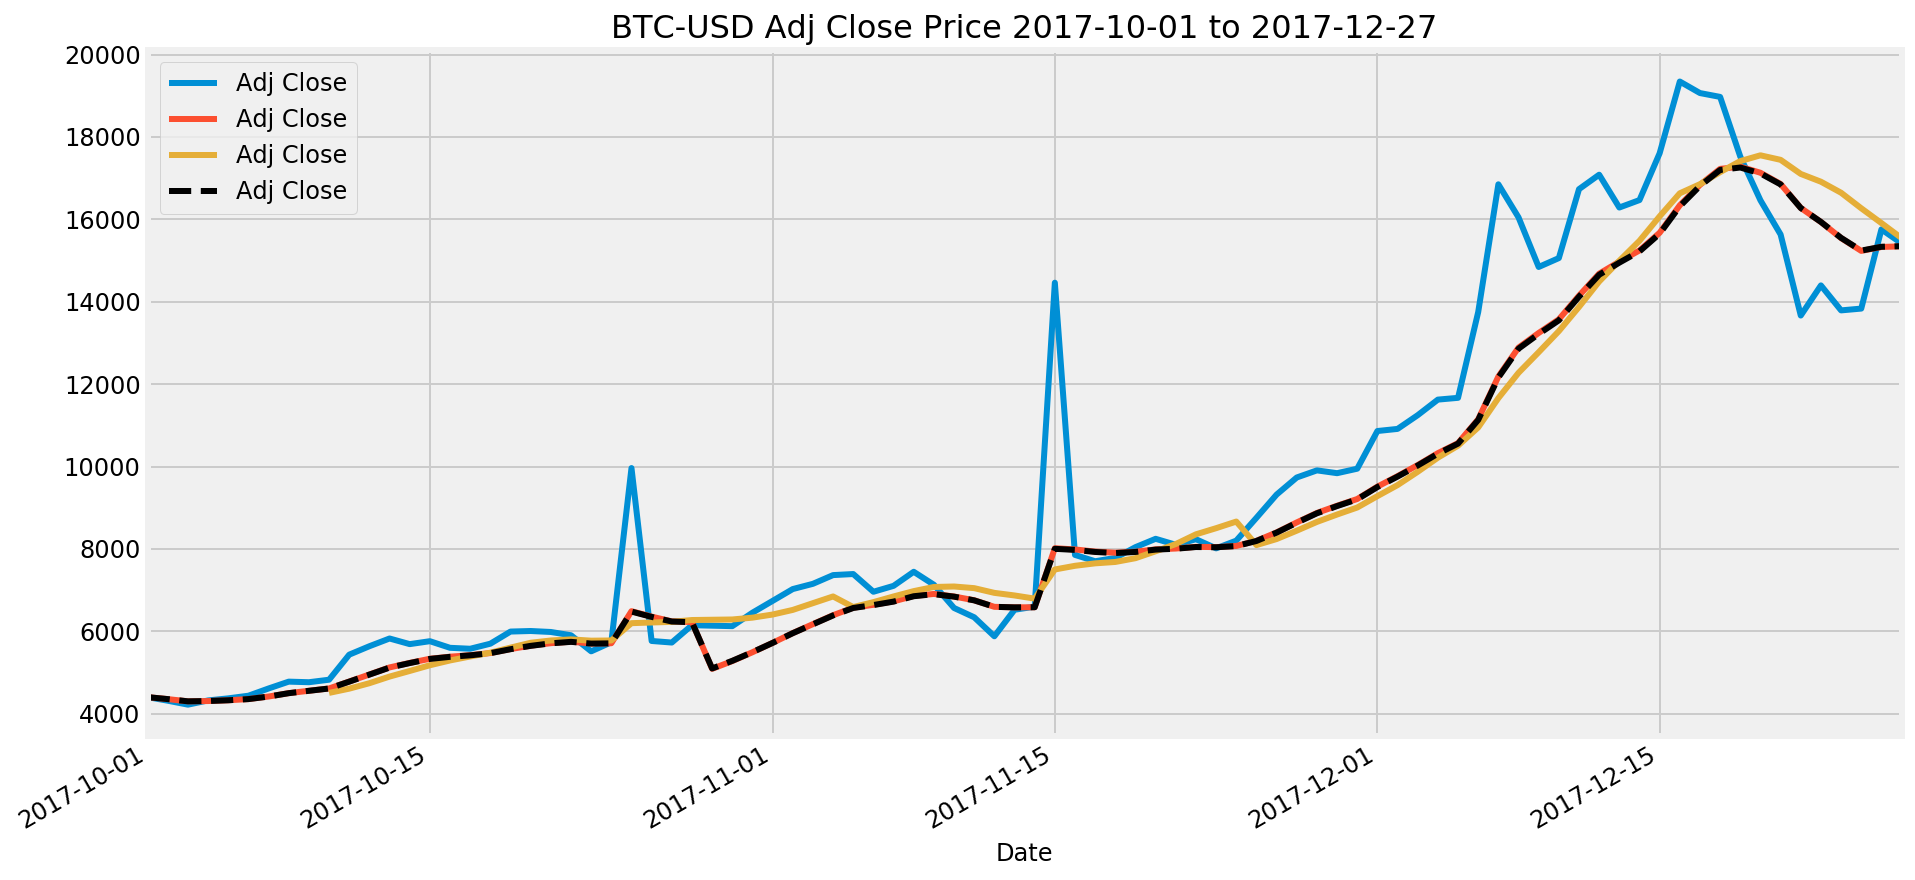

In [298]:
exp_weighted_mean = btc_recent.resample('D').sum().ewm(span=10).mean()
pexp_weighted_mean = pbtc.resample('D').sum().ewm(alpha=0.18).mean()

sma_d10 = btc_recent.rolling(window=10).mean()

ax = btc_recent.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window 10)')
sma_d10.plot(ax=ax, lw=3, label='SMA (window 10)')
pexp_weighted_mean.plot(ax=ax, lw=3, label='PEMA (window 10)',style='k--')

plt.title('BTC-USD Adj Close Price 2017-10-01 to 2017-12-27', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

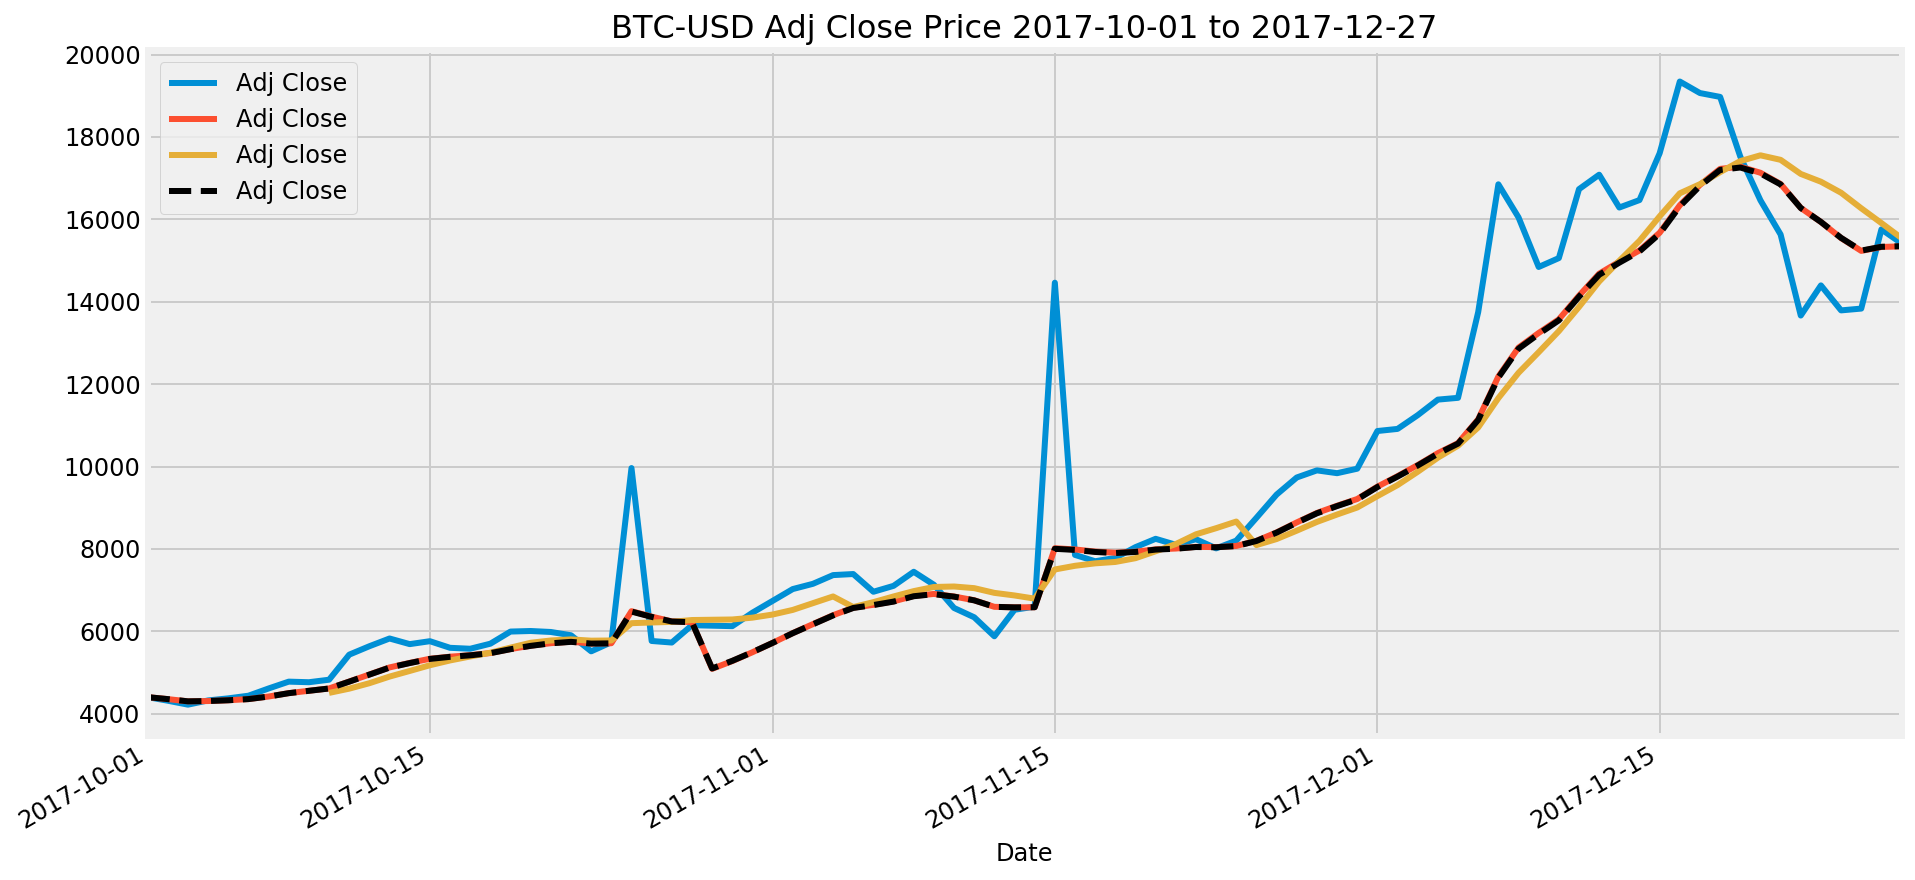

In [318]:
z=3
exp_weighted_mean = btc_recent.resample('D').sum().ewm(span=10).mean()
pexp_weighted_mean = pbtc.resample('D').sum().ewm(alpha=0.18).mean()

sma_d10 = btc_recent.rolling(window=10).mean()

ax = btc_recent.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window 10)')
sma_d10.plot(ax=ax, lw=3, label='SMA (window 10)')
pexp_weighted_mean.plot(ax=ax, lw=3, label='PEMA (window 10)',style='k--')

plt.title('BTC-USD Adj Close Price 2017-10-01 to 2017-12-27', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [367]:
btc_adj.shape

(362, 1)

In [52]:
T = 0		# initialization period (in cycles)
beta = 0.5	# lower values make the algorithm behave more like regular EWMA
a = 0.99
z= 3

In [393]:
#pewna parameters
T = 30      # initialization period (in cycles)
beta = 0.5  # lower values make the algorithm behave more like regular EWMA
a = 0.96    # the maximum value of the EWMA a parameter, used for outliers
#z = 3


#the PEWNA Model

# create a DataFrame for the run time variables we'll need to calculate
pewm = pd.DataFrame(index=btc_adj.index, columns=['Mean', 'Var', 'Std'], dtype=float)
pewm.iloc[0] = [btc_adj.iloc[0][value_col], 0, 0]

t = 0

for _, row in islice(btc_adj.iterrows(), 1, None):
    diff = row[value_col] - pewm.iloc[t].Mean # difference from moving average
    p = norm.pdf(diff / pewm.iloc[t].Std) if pewm.iloc[t].Std != 0 else 0 # Prob of observing diff
    a_t = a * (1 - beta * p) if t > T else 1 - 1/(t+1) # weight to give to this point
    incr = (1 - a_t) * diff

    # Update Mean, Var, Std
    pewm.iloc[t+1].Mean = pewm.iloc[t].Mean + incr
    pewm.iloc[t+1].Var = a_t * (pewm.iloc[t].Var + diff * incr)
    pewm.iloc[t+1].Std = sqrt(pewm.iloc[t+1].Var)
    t += 1

In [58]:
#import plotly
#plotly.tools.set_credentials_file(username='Juliansteam', api_key='pzcKrbsNmpNhFPDCaTse')
from scipy import stats
from datetime import datetime

import matplotlib.pyplot as plt


In [398]:
from __future__ import unicode_literals, division
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)

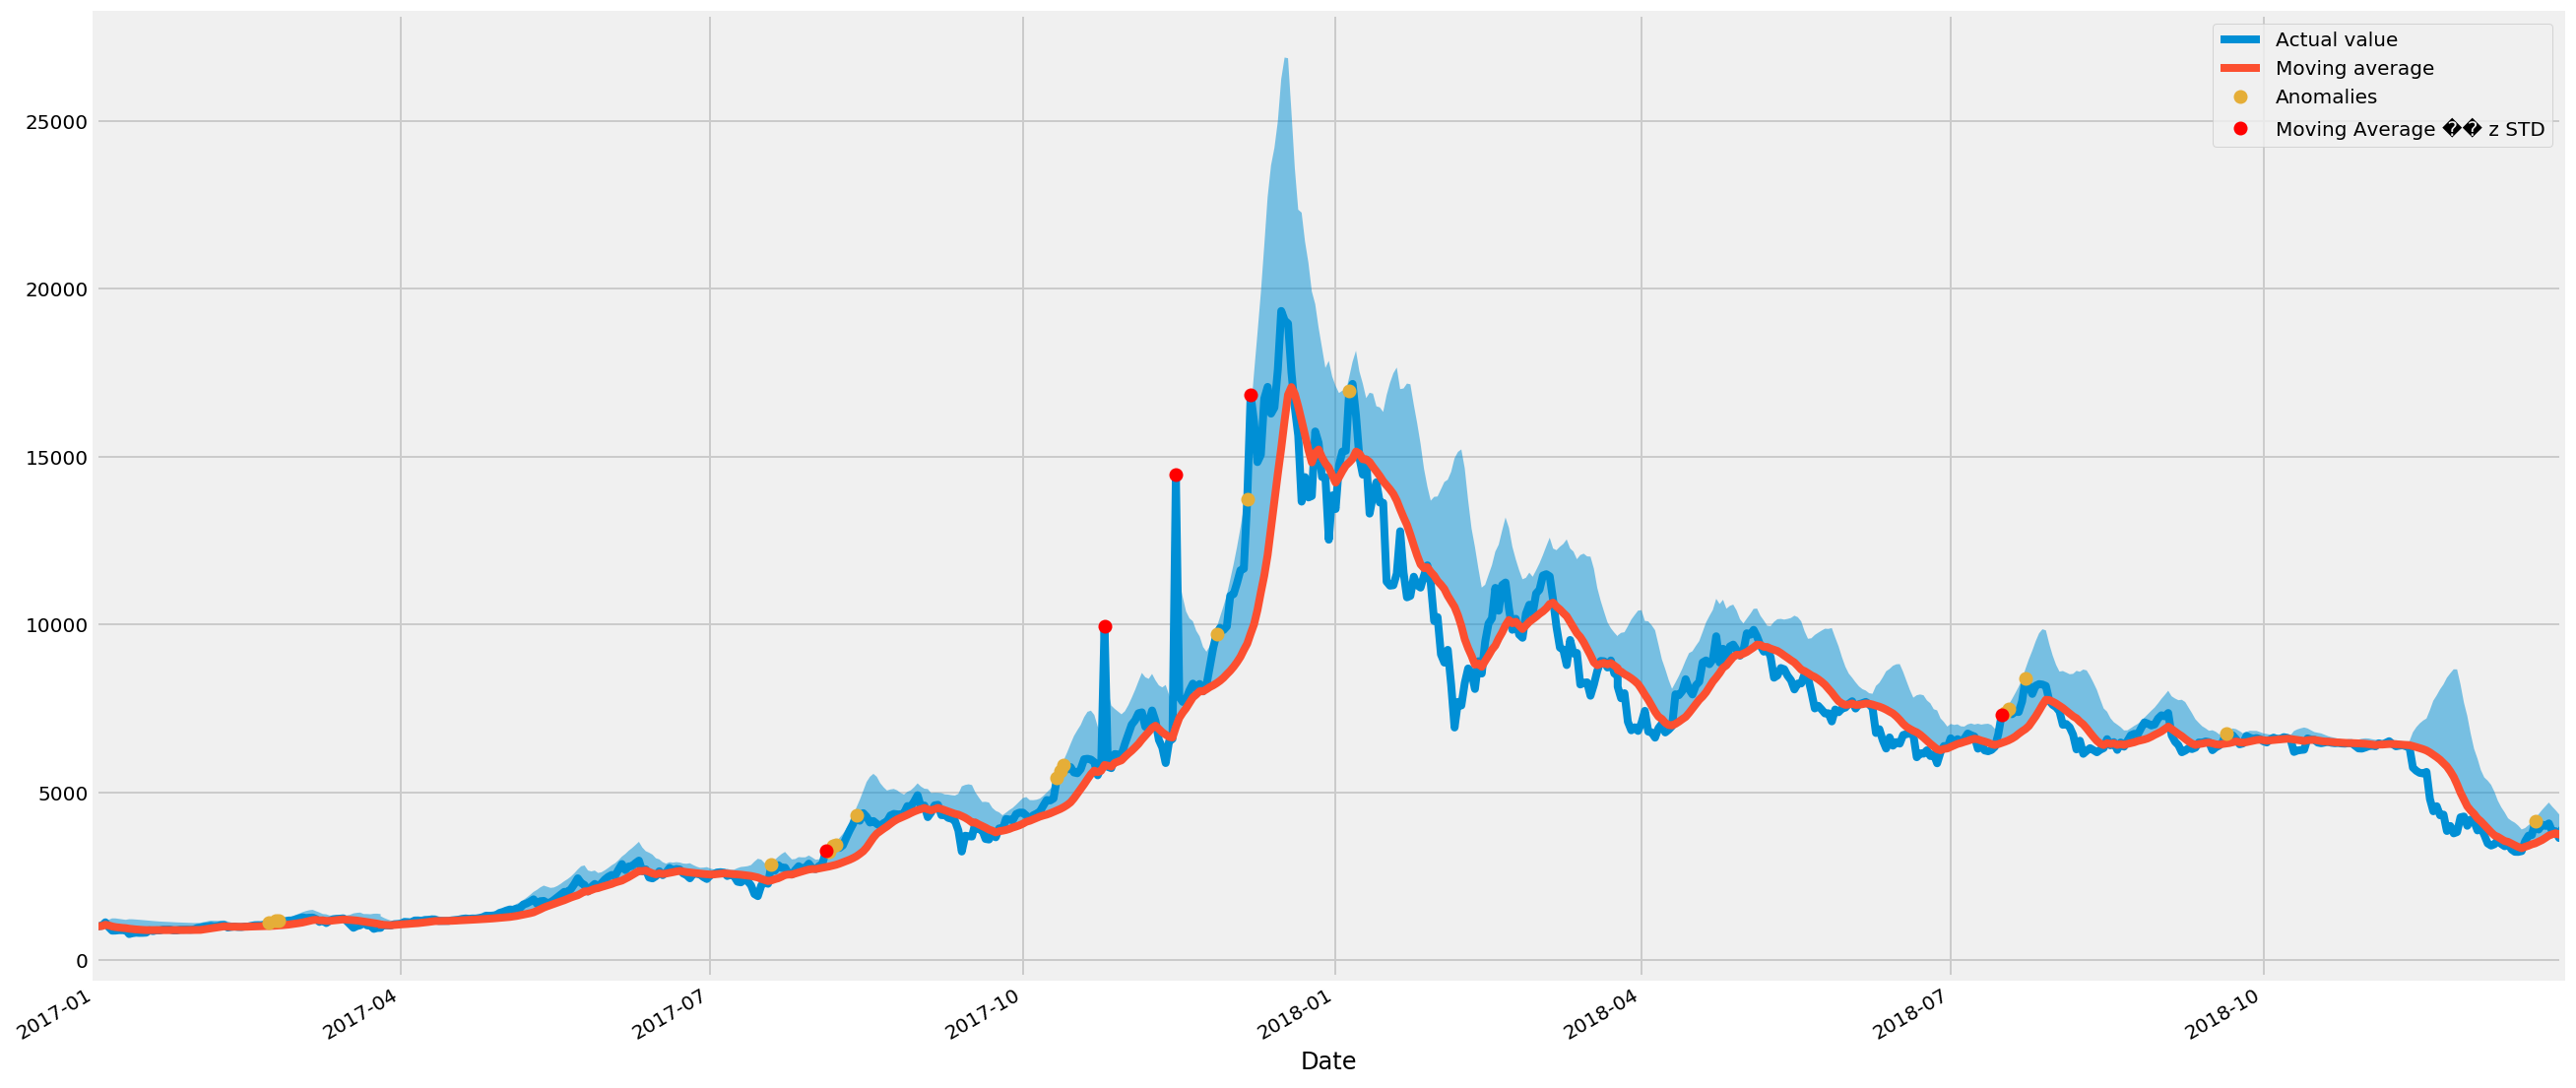

In [419]:
_, ax = plt.subplots() # initialize plot
z = 3
b = 2.5

# Define the boundary for what is considered an anomaly
pewm['Mean_plus_zStd'] = pewm.Mean.add(pewm.Std.mul(z))
pewm['Mean_minus_zStd'] = pewm.Mean.add(pewm.Std.mul(b))

# Identify anomalies
anomalies = btc_adj[(btc_adj[value_col] > pewm['Mean_plus_zStd'])]
warning = btc_adj[(btc_adj[value_col] > pewm['Mean_minus_zStd']) & (btc_adj[value_col] < pewm['Mean_plus_zStd'])]

btc_adj.plot(y = value_col, ax = ax) # plot raw data
pewm.plot(y = 'Mean', ax = ax) # plot moving average
#ax.set_xlim('2016-01-06 10:05:00','2016-01-06 17:05:00')
if not warning.empty:
    warning.plot(y = value_col, ax = ax, marker ='o',linestyle = 'None')

anomalies.plot(y = value_col, ax = ax, style=['ro']) # plot anomalies as red dots

ax.fill_between(btc_adj.index, pewm.Mean_plus_zStd, pewm.Mean, alpha=0.5) # fill the regions showing boundary for anomalies
ax.legend(['Actual value', 'Moving average', 'Moving Average + z STD', 'Moving Average - z STD']);
if not anomalies.empty:
    ax.legend(['Actual value', 'Moving average', 'Anomalies', 'Moving Average �� z STD']);
else:
    ax.legend(['Actual value', 'Moving average', 'Moving Average �� z STD']);

In [402]:
pewm.head()

,Mean,Var,Std,Mean_plus_zStd,Mean_minus_zStd
Date,,,,,
2017-01-01,995.440002,0.000000,0.000000,995.440002,995.440002
2017-01-02,1017.049988,0.000000,0.000000,1017.049988,1017.049988
2017-01-03,1025.175018,66.016121,8.125031,1049.550110,1004.862442
2017-01-04,1061.920024,2744.401575,52.387036,1219.081133,930.952433
2017-01-05,1043.777512,3045.753406,55.188345,1209.342546,905.806649
